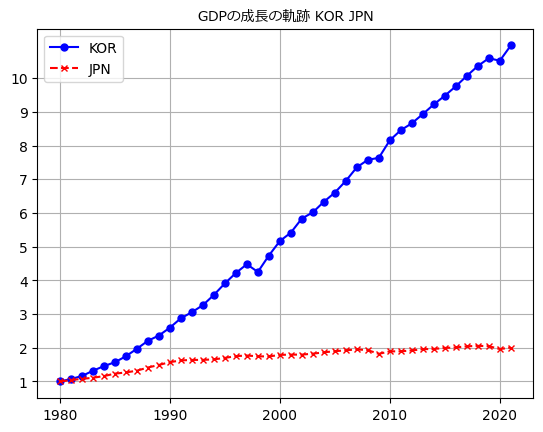

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import numpy as np
import json
import pprint

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#from selenium import webdriver
#from selenium.webdriver.support.ui import Select
#from selenium.webdriver.common.by import By  # Byクラスをインポート
import time
#from selenium.webdriver.chrome.service import Service

#DevToolを非表示にする
#chrome_options = webdriver.ChromeOptions()
#chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
#chrome_options.add_experimental_option('useAutomationExtension', False)

# WebDriverのパスを指定
#driver_path = 'C:\\Users\\ip2305\\AppData\\Local\\SeleniumBasic\\chromedriver-win64\\chromedriver.exe'
driver_path = 'C:\\Users\\ip2305\\Desktop\\chromedriver-win32\\chromedriver-win64\\chromedriver.exe'
# WebDriverを初期化
#service = Service(executable_path=driver_path )
#driver = webdriver.Chrome(service=service)


country_1=input("国名を略称で入力してください( AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,HUN,ISL,IRL,ITA,JPN,KOR,LUX,MEX,NLD,NZL,NOR,POL,PRT,SVK,ESP,SWE,CHE,TUR,GBR,USA,CHL,CHN,COL,EST,IND,IDN,ISR,RUS,SVN,ZAF,LVA,BRA,LTU,SAU,ARG,CRI,BGR,HRV,CYP,MLT,ROU,MKD,ZMB,HKG,MDG,MAR,SGP,ALB,SRB,GEO,CMR,SEN )")

country_2=input("国名を略称で入力してください( AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,HUN,ISL,IRL,ITA,JPN,KOR,LUX,MEX,NLD,NZL,NOR,POL,PRT,SVK,ESP,SWE,CHE,TUR,GBR,USA,CHL,CHN,COL,EST,IND,IDN,ISR,RUS,SVN,ZAF,LVA,BRA,LTU,SAU,ARG,CRI,BGR,HRV,CYP,MLT,ROU,MKD,ZMB,HKG,MDG,MAR,SGP,ALB,SRB,GEO,CMR,SEN )")


response_1="http://stats.oecd.org/sdmx-json/data/QNA/"+country_1+"+"+ country_2+".GDP+B1_GE.CUR+VOBARSA.A/all?startTime=1980&endTime=2021"
url=requests.get(response_1)
data_1 = url.json()  # JSONデータを取得

response_2="http://stats.oecd.org/sdmx-json/data/QNA/"+country_2+".GDP+B1_GE.CUR+VOBARSA.A/all?startTime=1980&endTime=2021"
url=requests.get(response_2)
data_2 = url.json()  # JSONデータを取得


#pprint.pprint(data)  # データを表示

# 'observations' 内のキーを数値順にソート
sorted_keys_1 = sorted(data_1['dataSets'][0]['series']['0:0:0:0']['observations'].keys(), key=int)
sorted_keys_2 = sorted(data_2['dataSets'][0]['series']['0:0:0:0']['observations'].keys(), key=int)
# 年度と値を取得
years_1 = []
years_2 = []

values_1 = []
values_2 = []
for year_key in sorted_keys_1:
    year_data_1 = data_1['dataSets'][0]['series']['0:0:0:0']['observations'][year_key]
    year = int(year_key)
    value = year_data_1[0]
    years_1.append(year)
    values_1.append(value)
for year_key in sorted_keys_2:
    year_data_2 = data_2['dataSets'][0]['series']['0:0:0:0']['observations'][year_key]
    year = int(year_key)
    value = year_data_2[0]
    years_2.append(year)
    values_2.append(value)
# 結果を表示
#for year, value in zip(years, values):
 #   print(f'Year: {year}, Value: {value}')

# JSONデータから 'values' リストを取得
values_list_1 = data_1['structure']['dimensions']['observation'][0]['values']
values_list_2 = data_2['structure']['dimensions']['observation'][0]['values']


# 'name' キーを昇順に並べ替えたリストを作成
sorted_names_1 = sorted([value['name'] for value in values_list_1])
sorted_names_2 = sorted([value['name'] for value in values_list_2])

# データAとデータBの初年度からの増加率を計算
increase_rate_1 = [values_1[i] / values_1[0] for i in range(len(values_1))]
increase_rate_2 = [values_2[i] / values_2[0] for i in range(len(values_2))]

# データAとデータBの初年度からの増加率に合わせて、Y軸の目盛りを調整
min_increase_rate = min(min(increase_rate_1), min(increase_rate_2))
max_increase_rate = max(max(increase_rate_1), max(increase_rate_2))


# データを正規化
normalized_values_1 = [value / values_1[0] for value in values_1]
normalized_values_2 = [value / values_2[0] for value in values_2]


# グラフを描画
plt.plot(sorted_names_1, normalized_values_1, marker='o', linestyle='-', color='b', markersize=5, label=country_1)
plt.plot(sorted_names_1, normalized_values_2, marker='x', linestyle='--', color='r', markersize=5, label=country_2)

# Y軸の目盛りを調整
y_ticks = [rate for rate in range(int(min_increase_rate), int(max_increase_rate) + 1)]
plt.yticks(y_ticks)
plt.legend(loc='upper left')

# グラフのタイトルを追加
plt.title('GDPの成長の軌跡 '+country_1+" "+country_2, fontproperties=FontProperties(fname="C:/Windows/Fonts/meiryo.ttc"))

# 横軸のラベルを10年おきに設定
plt.xticks(sorted_names_1[::10])


if sorted_names_1!=sorted_names_2:
    print("データの年度が一致しません。グラフを表示しません。")

else:
# グラフを表示
    plt.grid()
    plt.show()
#plt.plot(values_1, label=country_1)
#plt.plot(values_2, label=country_2)



#if sorted_names_1!=sorted_names_2:
#    print("データの年度が一致しません。グラフを表示しません。")

#else:
# 折れ線グラフを描画
#    fig, ax1 = plt.subplots()

    #縦軸ラベルを取得
#    unit_label_1 = data_1['structure']['attributes']['series'][1]['values'][0]['name']
 #   unit_label_2 = data_2['structure']['attributes']['series'][1]['values'][0]['name']

    # 左の軸（data_1用）
 #   ax1.set_xlabel('年度', fontproperties=FontProperties(fname="C:/Windows/Fonts/meiryo.ttc"))
  #  ax1.set_ylabel(f'Unit: {unit_label_1}', color='tab:blue')
 #   ax1.plot(sorted_names_1, values_1, marker='o', linestyle='-', color='b', markersize=5, label=country_1)
 #   ax1.tick_params(axis='y', labelcolor='tab:blue')
  #  y_ticks = [values_1[0] * rate for rate in range(int(min_increase_rate), int(max_increase_rate) + 1)]
  #  plt.yticks(y_ticks)
  #  plt.legend(loc='upper left')
    # 右の軸（data_2用）
  #  ax2 = ax1.twinx()
  #  ax2.set_ylabel(f'Unit: {unit_label_2}', color='tab:red')
  #  ax2.plot(sorted_names_1, values_2, marker='x', linestyle='--', color='r', markersize=5, label=country_2)
  #  ax2.tick_params(axis='y', labelcolor='tab:red')
  #  y_ticks = [values_2[0] * rate for rate in range(int(min_increase_rate), int(max_increase_rate) + 1)]
  #  plt.yticks(y_ticks)
  #  plt.legend(loc='center right')
    # グラフのタイトルを追加
  #  plt.title('年度ごとの値の推移', fontproperties=FontProperties(fname="C:/Windows/Fonts/meiryo.ttc"))

    # 横軸のラベルを10年おきに設定
  #  plt.xticks(sorted_names_1[::10])

    # グラフの凡例を表示
    #plt.legend(loc='upper left')

    # グラフを表示
 #   plt.grid()
  #  plt.show()